In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt 
import math, random
import numpy as np
from numba import njit
# from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train[:1000], dtype = 'float64')
y_train = y_train[:1000]

X_test = np.array(X_test[:300], dtype = 'float64')
y_test = y_test[:300]

In [ ]:
%%time
counter = 0
Euclidean_sum = 0  # сумма квадратов разностей координат
# Euclidean_min - хранит минимальное значение расстояния
index_min_dist = 0 # хранит индекс наиболее похожей картинки
for q in range(1000):
  digit_index = random.randint(0,299) # случайный индекс картинки из тестовой выборки
  Euclidean_sum = 0  # сумма квадратов разностей координат
  for i in range(len(X_train)):         # выбираю картинку в массиве
    for j in range(len(X_train[i])):     # выбираю строку в картинке
      for k in range(len(X_train[i][j])):  # выбираю пиксель в строке
        Euclidean_sum += (X_train[i][j][k] - X_test[digit_index][j][k])**2
    Euclidean_dist = math.sqrt(Euclidean_sum)
    Euclidean_sum = 0  # обнуляем значение переменной
    if i == 0:
      Euclidean_min = Euclidean_dist          # присваиваем переменной Euclidean_min начальное значение
    elif Euclidean_dist < Euclidean_min:
      Euclidean_min = Euclidean_dist          # сохраняем значение минимального расстояния
      index_min_dist = i                     # сохраняем индекс картинки
  if y_train[index_min_dist] == y_test[digit_index]:
    counter += 1

Accuracy = (counter / 1000) * 100
print('Accuracy:', Accuracy)

Accuracy: 82.89999999999999
CPU times: user 18min 43s, sys: 2.32 s, total: 18min 45s
Wall time: 18min 48s


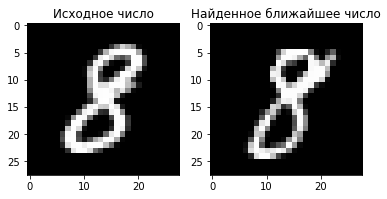

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_test[digit_index], cmap = 'gray')
ax[0].set(title = 'Исходное число')
ax[1].imshow(X_train[index_min_dist], cmap = 'gray')
ax[1].set(title = 'Найденное ближайшее число')
plt.show()

In [ ]:
### Numpy

%%time
counter = 0
# Euclidean_min - хранит минимальное значение расстояния
index_min_dist = 0 # хранит индекс наиболее похожей картинки
for q in range(1000):
  Euclidean_sum = 0  # сумма квадратов разностей координат
  digit_index = random.randint(0,299) # случайный индекс картинки из тестовой выборки
  for i in range(len(X_train)):
    square = np.square(X_train[i] - X_test[digit_index]) 
    Euclidean_sum = np.sum(square)
    Euclidean_dist = np.sqrt(Euclidean_sum)
    if i == 0:
      Euclidean_min = Euclidean_dist          # присваиваем переменной Euclidean_min начальное значение
    elif Euclidean_dist < Euclidean_min:
      Euclidean_min = Euclidean_dist          # сохраняем значение минимального расстояния
      index_min_dist = i                     # сохраняем индекс картинки
  if y_train[index_min_dist] == y_test[digit_index]:
      counter += 1
Accuracy = (counter / 1000) * 100
print('Accuracy:', Accuracy)

Accuracy: 82.89999999999999
CPU times: user 10.7 s, sys: 87.5 ms, total: 10.8 s
Wall time: 10.7 s


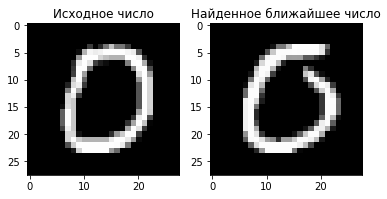

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_test[digit_index], cmap = 'gray')
ax[0].set(title = 'Исходное число')
ax[1].imshow(X_train[index_min_dist], cmap = 'gray')
ax[1].set(title = 'Найденное ближайшее число')
plt.show()

In [ ]:
### Numba + чистый Python
%%time
# digit_index = random.randint(0,299) # случайный индекс картинки из тестовой выборки
# Euclidean_sum = 0  # сумма квадратов разностей координат
# Euclidean_min - хранит минимальное значение расстояния
# index_min_dist = 0 # хранит индекс наиболее похожей картинки

@njit()
def Euclidean_distance(X1, X2, Euclidean_sum = 0):
  digit_index = random.randint(0,299) # случайный индекс картинки из тестовой выборки
  index_min_dist = 0 # хранит индекс наиболее похожей картинки
  for i in range(len(X1)):
    for j in range(len(X1[i])):
      for k in range(len(X1[i][j])):
        Euclidean_sum += (X1[i][j][k] - X2[digit_index][j][k])**2
    Euclidean_dist = math.sqrt(Euclidean_sum)
    Euclidean_sum = 0                         # обнуляем значение переменной
    if i == 0:
      Euclidean_min = Euclidean_dist          # присваиваем переменной Euclidean_min начальное значение
    elif Euclidean_dist < Euclidean_min:
      Euclidean_min = Euclidean_dist          # сохраняем значение минимального расстояния
      index_min_dist = i                      # сохраняем индекс картинки
  return([Euclidean_min, index_min_dist, digit_index, y_test[digit_index], y_train[index_min_dist]])

CPU times: user 256 µs, sys: 0 ns, total: 256 µs
Wall time: 261 µs


In [ ]:
%%time
counter = 0
for q in range(1000):
  m = Euclidean_distance(X_train, X_test)
  if m[3] == m[4]:
    counter += 1
Accuracy = (counter / 1000) * 100
print('Accuracy:', Accuracy)

Accuracy: 83.3
CPU times: user 1.21 s, sys: 6.01 ms, total: 1.22 s
Wall time: 1.22 s


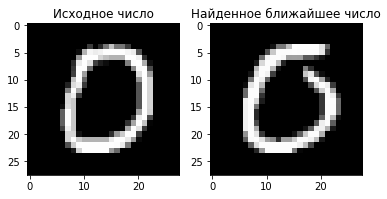

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_test[digit_index], cmap = 'gray')
ax[0].set(title = 'Исходное число')
ax[1].imshow(X_train[index_min_dist], cmap = 'gray')
ax[1].set(title = 'Найденное ближайшее число')
plt.show()

In [ ]:
### Numba + Numpy
%%time

# Euclidean_sum = 0  # сумма квадратов разностей координат
# Euclidean_min - хранит минимальное значение расстояния
# index_min_dist = 0 # хранит индекс наиболее похожей картинки

@njit()
def Euclidean_distance_1(X1, X2):
  index_min_dist = 0 # хранит индекс наиболее похожей картинки
  digit_index = random.randint(0,299) # случайный индекс картинки из тестовой выборки
  for i in range(len(X1)):
    square = np.square(X1[i] - X2[digit_index]) 
    Euclidean_sum = np.sum(square)
    Euclidean_dist = np.sqrt(Euclidean_sum)
    if i == 0:
      Euclidean_min = Euclidean_dist          # присваиваем переменной Euclidean_min начальное значение
    elif Euclidean_dist < Euclidean_min:
      Euclidean_min = Euclidean_dist          # сохраняем значение минимального расстояния
      index_min_dist = i                      # сохраняем индекс картинки
  return([Euclidean_min, index_min_dist, digit_index, y_test[digit_index], y_train[index_min_dist]])

CPU times: user 243 µs, sys: 0 ns, total: 243 µs
Wall time: 247 µs


In [ ]:
%%time
counter = 0
for q in range(1000):
  m = Euclidean_distance_1(X_train, X_test)
  if m[3] == m[4]:
    counter += 1
Accuracy = (counter / 1000) * 100
print('Accuracy:', Accuracy)

Accuracy: 82.39999999999999
CPU times: user 1.73 s, sys: 9 ms, total: 1.73 s
Wall time: 1.74 s


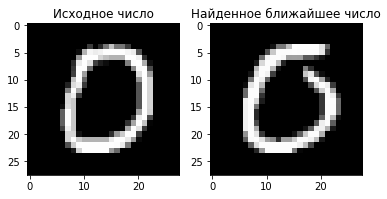

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(X_test[digit_index], cmap = 'gray')
ax[0].set(title = 'Исходное число')
ax[1].imshow(X_train[index_min_dist], cmap = 'gray')
ax[1].set(title = 'Найденное ближайшее число')
plt.show()